<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/Estatistica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Descritive Statistics

### Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/shampoo.csv', sep=',')

In [5]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Visualizations

#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe67dd7250>]],
      dtype=object)

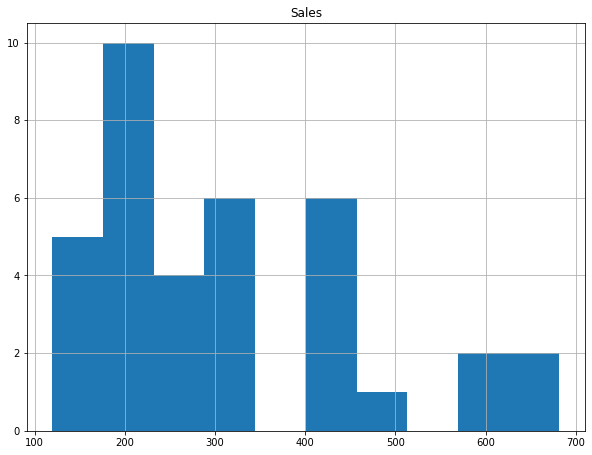

In [8]:
data.hist()

Text(0, 0.5, 'Frequency')

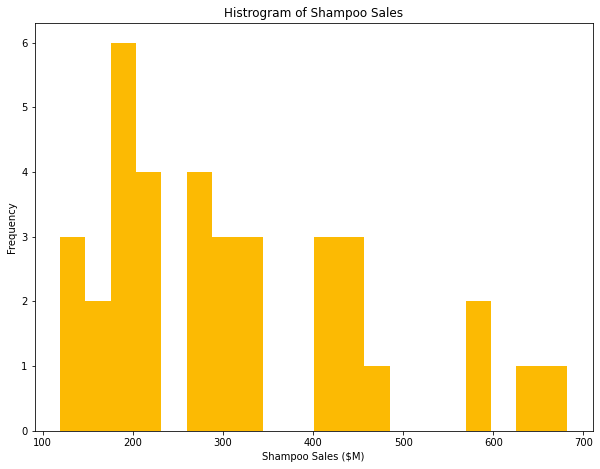

In [11]:
plt.hist(data['Sales'], bins = 20, color = '#fcba03')
plt.title('Histrogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

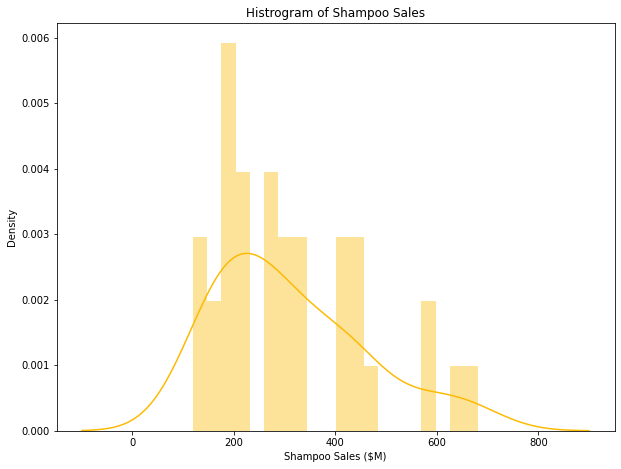

In [13]:
sns.distplot(data['Sales'], bins = 20, hist = True, kde = True, color = '#fcba03')
plt.title('Histrogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Density')

### Scatterplots

Text(0.5, 0, 'Month')

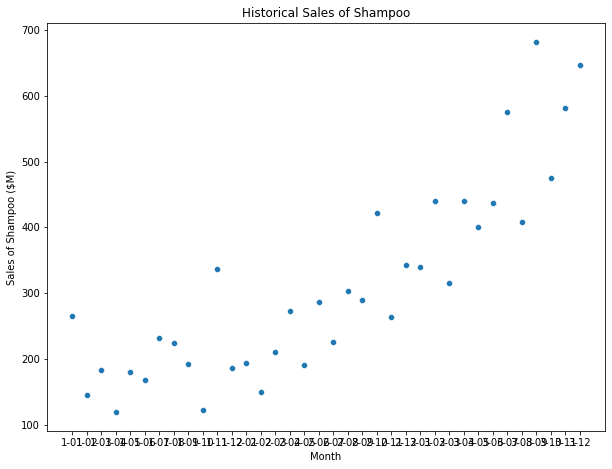

In [14]:
sns.scatterplot(x = data['Month'], y = data['Sales'])
plt.title('Historical Sales of Shampoo')
plt.ylabel('Sales of Shampoo ($M)')
plt.xlabel('Month')

## Inferential Statistics

In [15]:
co2_data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/co2_dataset.csv')

In [16]:
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [20]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

Text(0.5, 0, 'Year')

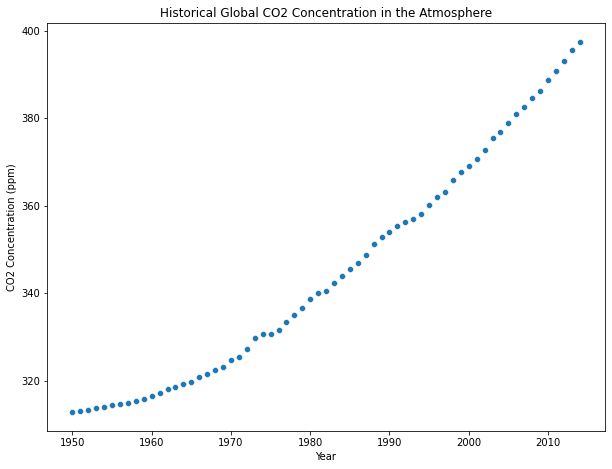

In [21]:
sns.scatterplot(x=X, y=y)
plt.title('Historical Global CO2 Concentration in the Atmosphere')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')

In [23]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X, y)

LinearRegression()

In [29]:
print(f'The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}')

The slope is 1.3588711929434647 and the intercept is -2348.0338300545372


### Plot regression

In [31]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

In [32]:
predictions = reg.predict(X.reshape(-1, 1))

Text(0.5, 0, 'Year')

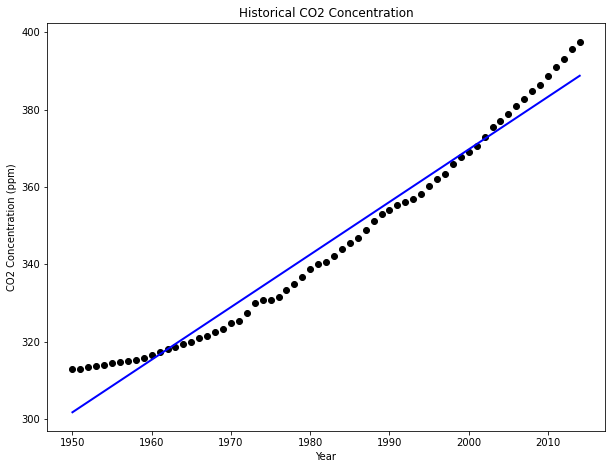

In [33]:
plt.scatter(X, y, c = 'black')
plt.plot(X, predictions, c = 'blue', linewidth = 2)
plt.title('Historical CO2 Concentration')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')

### Summary using OLS

In [35]:
X = sm.add_constant(co2_data['year'].values[1950:])

In [36]:
model = sm.OLS(co2_data['data_mean_global'].values[1950:], X).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           6.40e-50
Time:                        13:59:31   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

### Resíduos (qq plot)

In [40]:
residuals = model.resid

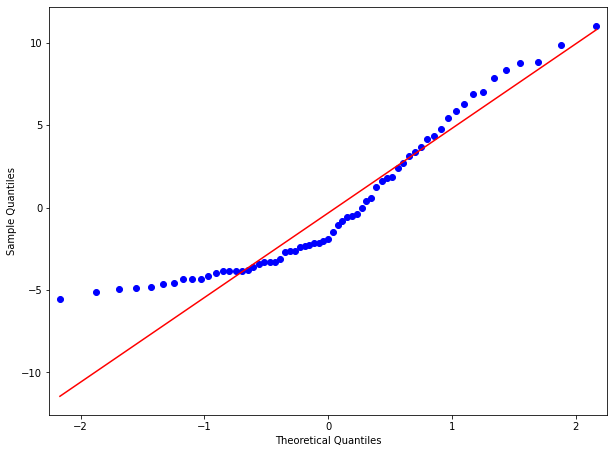

In [42]:
qq_plot = sm.qqplot(residuals, line = 'q')

(array([12., 17.,  8.,  5.,  6.,  5.,  3.,  3.,  4.,  2.]),
 array([-5.55069622, -3.89002908, -2.22936195, -0.56869481,  1.09197233,
         2.75263947,  4.4133066 ,  6.07397374,  7.73464088,  9.39530802,
        11.05597516]),
 <a list of 10 Patch objects>)

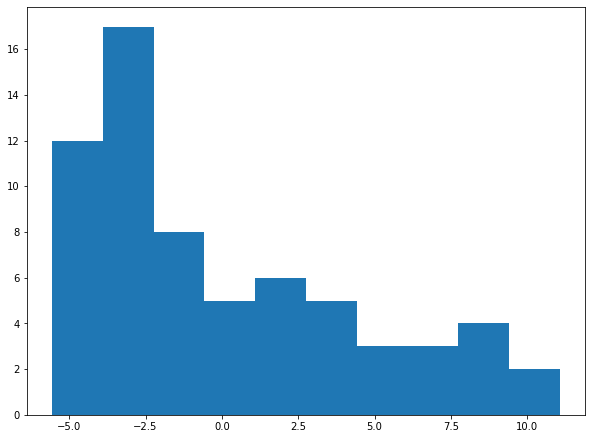

In [43]:
plt.hist(residuals)

**O histograma dos resíduos não possui uma distribuição normal. Portanto, a regressão linear não é um bom modelo para ajustar a esse conjunto de dados.**